In [23]:
import xgboost as xgb
import pandas as pd
import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
alltrain_df = pd.read_csv('./all_train_nohash.csv')
alltest_df = pd.read_csv('./all_test_nohash.csv')

/usr/cac/rhel6/lsa/anaconda-vis-portal/latest/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (28,59,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/cac/rhel6/lsa/anaconda-vis-portal/latest/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (27,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
alltrain_df.iloc[:, (28,59,60,68)]

,RAIL,VIN_6,VIN_7,MCARR_ID
0,0000000,1,4,0
1,0000000,E,H,0
2,0000000,1,4,0
3,0000000,1,4,0
4,0000000,2,0,0
5,0000000,2,0,0
6,0000000,2,0,0
7,0000000,1,8,0
8,0000000,1,8,0
9,0000000,1,8,0


In [5]:
alltest_df.iloc[:, (27,66)]

,RAIL,MCARR_ID
0,0000000,00000000000
1,0000000,00000000000
2,0000000,00000000000
3,0000000,00000000000
4,0000000,00000000000
5,0000000,00000000000
6,0000000,00000000000
7,0000000,00000000000
8,0000000,00000000000
9,0000000,00000000000


In [6]:
print(alltrain_df.shape)
print(alltrain_df.columns.tolist())

(1357940, 149)
['Unnamed: 0', 'ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'YEAR', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'TWAY_ID', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'STATE.y', 'VEH_NO.x', 'VE_FORMS.y', 'HARM_EV.y', 'MAN_COLL.y', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH.x', 'J_KNIFE', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', '

In [7]:
print(alltest_df.shape)
print(alltest_df.columns.tolist())

(543015, 147)
['Unnamed: 0', 'ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'TWAY_ID', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'STATE.y', 'VEH_NO.x', 'VE_FORMS.y', 'HARM_EV.y', 'MAN_COLL.y', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH.x', 'J_KNIFE', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'P

In [8]:
drops = ["Unnamed: 0",
         "VE_FORMS.y","HARM_EV.y","MAN_COLL.y","RAIL","TWAY_ID",
         "CF1","CF2","CF3",
         "VIN","VIN_1","VIN_2","VIN_3","VIN_4","VIN_5","VIN_6","VIN_7","VIN_8",
         "VIN_9","VIN_10","VIN_11","VIN_12","MCARR_ID",
         "VEH_NO.y","COUNTY.y", "DAY.y","MONTH.y","HOUR.y","MINUTE.y","ROAD_FNC.y",
         "SCH_BUS.y","MAKE.y","MAK_MOD.y","BODY_TYP.y","MOD_YEAR.y",
         "TOW_VEH.y","SPEC_USE.y","EMER_USE.y","ROLLOVER.y","IMPACT1.y","FIRE_EXP.y",
         "CERT_NO"
        ]

In [9]:
for col in drops:
    del alltrain_df[col]

In [10]:
for col in drops:
    del alltest_df[col]

In [11]:
print(alltrain_df.shape)
print(alltrain_df.columns.tolist())

(1357940, 107)
['ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'YEAR', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'FATALS', 'DRUNK_DR', 'STATE.y', 'VEH_NO.x', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'TOW_VEH.x', 'J_KNIFE', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'PREV_ACC', 'PREV_SUS', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'FIRST_MO', 'FIRST_YR', 'LAST_MO', 'LAST_YR', 'DEATHS', 'STATE', 'VE_FORMS', 'PER_NO', 'HARM_EV', 'MAN_COLL', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 

In [12]:
print(alltest_df.shape)
print(alltest_df.columns.tolist())

(543015, 105)
['ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'FATALS', 'STATE.y', 'VEH_NO.x', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'TOW_VEH.x', 'J_KNIFE', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'PREV_ACC', 'PREV_SUS', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'FIRST_MO', 'FIRST_YR', 'LAST_MO', 'LAST_YR', 'DEATHS', 'STATE', 'VE_FORMS', 'PER_NO', 'HARM_EV', 'MAN_COLL', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE

In [13]:
alltrain_df

,ID,STATE.x,VE_FORMS.x,PEDS,PERSONS,COUNTY.x,CITY,YEAR,DAY.x,MONTH.x,...,DEATH_MO,DEATH_HR,DEATH_MN,DEATH_TM,LAG_HRS,LAG_MINS,WORK_INJ,HISPANIC,RACE,LOCATION
0,0,1,1,0,1,21,0,2003,1,1,...,1,9,5,905,1,35,9,7,1,0
1,1,1,1,0,1,71,0,2003,1,1,...,1,16,44,1644,0,54,0,7,1,0
2,2,1,1,0,1,51,0,2003,5,1,...,1,13,35,1335,1,16,0,7,2,0
3,3,1,1,0,1,111,0,2003,4,1,...,1,8,25,825,0,35,0,1,1,0
4,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
5,4,1,2,0,3,13,0,2003,1,1,...,1,19,30,1930,0,0,0,7,2,0
6,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
7,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
8,4,1,2,0,3,13,0,2003,1,1,...,1,19,30,1930,0,0,0,7,2,0
9,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0


In [14]:
print(alltrain_df.shape)
print(alltest_df.shape)

(1357940, 107)
(543015, 105)


In [15]:
train_x = alltrain_df.drop(['DRUNK_DR','YEAR'], axis=1)
train_y = alltrain_df['DRUNK_DR']
test_x = alltest_df

In [16]:
print(train_x.shape)
print(train_y.shape)

(1357940, 105)
(1357940,)


In [17]:
train_y.head()

0    False
1     True
2     True
3    False
4    False
Name: DRUNK_DR, dtype: bool

In [18]:
dic = {"False":0, "True":1}
train_y.replace({"DRUNK_DR": dic}, inplace=True)
train_y.head()

0    False
1     True
2     True
3    False
4    False
Name: DRUNK_DR, dtype: bool

In [19]:
train_y.astype(int)

0          0
1          1
2          1
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         1
12         1
13         1
14         1
15         1
16         1
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1357910    0
1357911    0
1357912    0
1357913    0
1357914    0
1357915    0
1357916    0
1357917    0
1357918    0
1357919    0
1357920    0
1357921    0
1357922    1
1357923    1
1357924    1
1357925    0
1357926    0
1357927    0
1357928    0
1357929    0
1357930    0
1357931    0
1357932    0
1357933    0
1357934    0
1357935    0
1357936    0
1357937    0
1357938    0
1357939    0
Name: DRUNK_DR, dtype: int64

In [20]:
trainX = train_x.as_matrix()
trainY = train_y.astype(int)
testX = test_x.as_matrix()

In [21]:
dtrain = xgb.DMatrix(trainX, label=trainY)
dtest = xgb.DMatrix(testX)

In [27]:
dtrain.get_label()

array([ 0.,  1.,  1., ...,  0.,  0.,  0.], dtype=float32)

In [26]:
dtest.get_weight()

array([], dtype=float32)

### Original parameters

In [22]:
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'binary:logitraw'
# scale weight of positive examples
# param['scale_pos_weight'] = sum_wneg/sum_wpos
param['eta'] = 0.1
param['max_depth'] = 7
param['eval_metric'] = 'auc'
# param['silent'] = 1
# param['min_child_weight'] = 1
# param['subsample'] = 0.7
# param['colsample_bytree'] = 0.7
param['nthread'] = 8

In [23]:
evallist  = [(dtest,'eval'), (dtrain,'train')]

### 50-fold cross validation training

In [24]:
cv_nround = 50
cv_nfold = 3
bst_cv = xgb.cv(param, dtrain, num_boost_round=cv_nround, nfold=cv_nfold)
bst_cv

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.814143,0.001032,0.814696,0.000660
1,0.818883,0.000760,0.819405,0.000978
2,0.821804,0.001615,0.822346,0.002110
3,0.825639,0.000439,0.826339,0.000884
4,0.827842,0.000771,0.828597,0.001167
5,0.829106,0.000537,0.829873,0.000843
6,0.830835,0.000724,0.831603,0.001023
7,0.832047,0.000566,0.832842,0.000782
8,0.833346,0.000384,0.834178,0.000590
9,0.834335,0.000147,0.835151,0.000421


### Parameter tuning
1. for `scale_pos_weight`, read more [here](https://github.com/dmlc/xgboost/blob/master/demo/kaggle-higgs/speedtest.py)
2. If you care about predicting the right probability, which in such a case, you cannot re-balance the dataset. Set parameter `max_delta_step` to a finite number (say 1) will help convergence. Read more [here](https://github.com/dmlc/xgboost/blob/master/doc/param_tuning.md)

In [24]:
# parameter tuning
# random.seed(1024)

param = {}
param['objective'] = 'binary:logitraw'

# scale weight of positive examples
# rescale weight to make it same as test set
# testsize = 543015
# weight = dtrain[:,31] * float(test_size) / len(train_y)
# param['scale_pos_weight'] = sum_wneg/sum_wpos

ratio = float(np.sum(label == 0)) / np.sum(label==1)
param['scale_pos_weight'] = ratio

param['eta'] = 0.05
param['max_depth'] = 7
# param['eval_metric'] = 'auc'
# param['silent'] = 1
param['min_child_weight'] = 1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['nthread'] = 8

# Sean:: can't understand how to get dtrain[:, 31]=weight !!
# https://github.com/dmlc/xgboost/blob/master/demo/kaggle-higgs/higgs-cv.py
# def fpreproc(dtrain, dtest, param):
#     label = dtrain.get_label()
#     ratio = float(np.sum(label == 0)) / np.sum(label==1)
#     print("ratio= ", ratio)
#     param['scale_pos_weight'] = ratio
#     wtrain = dtrain.get_weight()
#     wtest = dtest.get_weight()
#     sum_weight = sum(wtrain) + sum(wtest)
#     wtrain *= sum_weight / sum(wtrain)
#     wtest *= sum_weight / sum(wtest)
#     print("final wtrain, wtest = ", wtrain, wtest)
#     dtrain.set_weight(wtrain)
#     dtest.set_weight(wtest)
#     return (dtrain, dtest, param)

bst_cv = xgb.cv(param, dtrain, num_round=500, nfold=5, metrics={'ams@0.15', 'auc'}, seed=0, early.stop.round=10)
bst_cv

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.811522,0.000698,0.812043,0.000599
1,0.821025,0.000351,0.821643,0.000373
2,0.823344,0.002627,0.823991,0.002219
3,0.825539,0.002491,0.826235,0.002413
4,0.827626,0.000730,0.828290,0.000864
5,0.828207,0.000461,0.828929,0.000570
6,0.828406,0.001315,0.829134,0.001102
7,0.829375,0.000761,0.830085,0.000648
8,0.829836,0.000498,0.830534,0.000372
9,0.830188,0.000725,0.830908,0.000305


### 100-fold cross validation training

In [25]:
cv_nround = 100
cv_nfold = 3
bst100_cv = xgb.cv(param, dtrain, num_boost_round=cv_nround, nfold=cv_nfold)
bst100_cv

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.814143,0.001032,0.814696,0.000660
1,0.818883,0.000760,0.819405,0.000978
2,0.821804,0.001615,0.822346,0.002110
3,0.825639,0.000439,0.826339,0.000884
4,0.827842,0.000771,0.828597,0.001167
5,0.829106,0.000537,0.829873,0.000843
6,0.830835,0.000724,0.831603,0.001023
7,0.832047,0.000566,0.832842,0.000782
8,0.833346,0.000384,0.834178,0.000590
9,0.834335,0.000147,0.835151,0.000421


### xgb_submisstion: _v0.001: nround=10; v0.002: nround=50; v0.003: nround=100_

In [26]:
num_round = 100

In [27]:
bst = xgb.train(param, dtrain, num_round)
bst

In [28]:
ypred = bst.predict(dtest)

In [29]:
ypred

array([-1.18397951, -1.49954176, -0.6088497 , ..., -2.88058782,
       -2.67039251, -3.04965854], dtype=float32)

In [30]:

len(ypred)

543015

### Plotting important features

In [ ]:
xgb.importance(train$dataDimnames[[2]], model = bst)

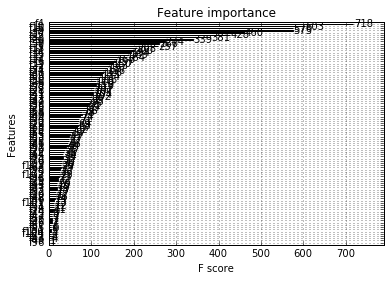

In [45]:
xgb.plot_importance(bst)

In [46]:
# xgb.to_graphviz(bst, num_trees=2)

### Given a prediction, create a Kaggle submission file


In [47]:
submit = pd.DataFrame(data={'ID': alltest_df['ID'], 'DRUNK_DR': ypred})
submit

,DRUNK_DR,ID
0,-1.183980,0
1,-1.499542,1
2,-0.608850,1
3,-1.518499,1
4,-1.572906,1
5,-0.547461,1
6,-1.631071,1
7,-2.236388,2
8,-2.535650,2
9,-2.390640,2


### There seems to have duplicating values.  Using groupby() to select the first value


In [48]:
submit_uniq = submit.groupby('ID').first().reset_index()
print(submit_uniq.shape)
submit_uniq

(121065, 2)


,ID,DRUNK_DR
0,0,-1.183980
1,1,-1.499542
2,2,-2.236388
3,3,-3.689660
4,4,-3.250088
5,5,-0.924876
6,6,-2.186034
7,7,-1.380811
8,8,-2.042573
9,9,-0.647225


In [49]:
submit_uniq.to_csv('fars_submit_xgb003.csv', index = False)

In [50]:
%whos

Variable      Type          Data/Info
-------------------------------------
alltest_df    DataFrame                 ID  STATE.x  <...>43015 rows x 105 columns]
alltrain_df   DataFrame                  ID  STATE.x <...>57940 rows x 107 columns]
bst           Booster       <xgboost.core.Booster object at 0x2b5e0d297c88>
bst100_cv     DataFrame         test-auc-mean  test-a<...>n\n[100 rows x 4 columns]
bst_cv        DataFrame         test-auc-mean  test-a<...>  0.869810       0.000372
col           str           CERT_NO
cv_nfold      int           3
cv_nround     int           100
dic           dict          n=2
drops         list          n=42
dtest         DMatrix       <xgboost.core.DMatrix object at 0x2b5e0d5dbc88>
dtrain        DMatrix       <xgboost.core.DMatrix object at 0x2b5e0d600198>
evallist      list          n=2
logger        RootLogger    <logging.RootLogger object at 0x2b5ddcffd748>
logging       module        <module 'logging' from '/<...>3.5/logging/__init__.py'>
np     

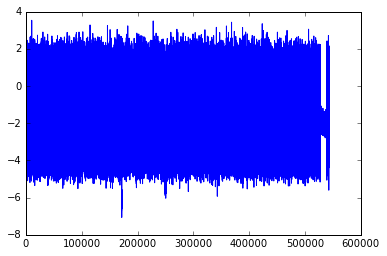

In [31]:
plt.plot(ypred)

In [36]:
test = np.sort(ypred)

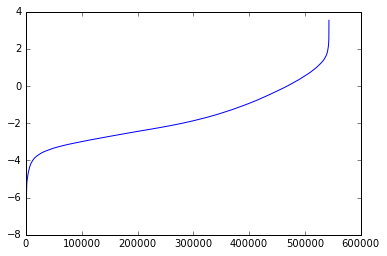

In [37]:
plt.plot(test)

## Tuning xgboost
From [here](http://www.slideshare.net/odsc/owen-zhangopen-sourcetoolsanddscompetitions1) and [here](http://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author). There's also an indepth analysis using `gridSearchCV` [here](http://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

Tuning and CV strategy for XGB:
Typically, people use 5 folds. You can make a choice. To see the reliability of CV estimate, a few guys use 10-fold as well. 
Steps: 1. Decide 'n' in n-fold. Stick to it for complete analysis.
2. Create a baseline score using a simple model.
3. Now, use XGBoost default settings and establish another XGB baseline score.
4. Put num_trees at 10000 and a tiny learning rate of 0.01.
5. Try step(4) for various max_depth.
6. While doing step(4), monitor the progress. Note at what tree# is the model overfitting
7. After you're done with 1-6, you would have reached a saturation score
8. Now comes some magic! Start using subsample and tada, your score improves.
9. Use colsample_bytree, then scale_pos_weight, improve your score
10. Try using max_delta_step and gamma too (a little tricky to tune)



<img src = "images/tuning_xgb1.png" align="left">